In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [5]:
np.random.seed(100)
data_x = np.linspace(-10.0, 10.0, 100)[:,np.newaxis]
#data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_y = 29*data_x +20* np.random.randn(100,1)
data_x /= np.max(data_x)
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [3]:
data_x = np.hstack((np.ones_like(data_x),data_x))
data_x

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [8]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(test_x.size, train_x.size, test_y.size, train_y.size)
print(test_x)

40 160 20 80
[[ 1.          0.53535354]
 [ 1.         -0.39393939]
 [ 1.          0.03030303]
 [ 1.         -0.53535354]
 [ 1.         -0.57575758]
 [ 1.          0.75757576]
 [ 1.          0.63636364]
 [ 1.          0.17171717]
 [ 1.         -0.19191919]
 [ 1.          0.35353535]
 [ 1.         -0.71717172]
 [ 1.          0.5959596 ]
 [ 1.          0.45454545]
 [ 1.          0.93939394]
 [ 1.          0.81818182]
 [ 1.          0.39393939]
 [ 1.         -0.93939394]
 [ 1.          0.65656566]
 [ 1.          0.49494949]
 [ 1.         -1.        ]]


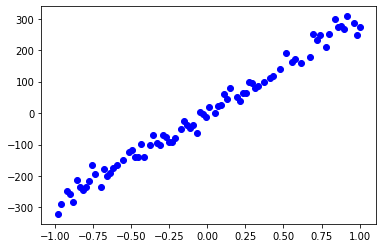

In [11]:
plt.scatter(train_x[:,1],train_y, c='b', label='Data')
plt.show()

In [12]:
def get_gradient(w, x, y):
    y_estimate =(x).dot(w).flatten()
    error = (y.flatten()- y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

In [13]:
w = np.random.randn(2)
alpha = 0.25
tolerance = 1e-3
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
1.2190846332783454 1.1587837780089076
Iteration: 10 - Error: 6473.0773
Updated Weights : 159.213077 , -1.411998
Iteration: 20 - Error: 1527.4078
Updated Weights : 237.148674 , 1.441671
Iteration: 30 - Error: 638.8468
Updated Weights : 270.172389 , 2.928060
Iteration: 40 - Error: 479.1842
Updated Weights : 284.170265 , 3.573642
Iteration: 50 - Error: 450.4949
Updated Weights : 290.103858 , 3.848170
Iteration: 60 - Error: 445.3398
Updated Weights : 292.619076 , 3.964590
Iteration: 70 - Error: 444.4135
Updated Weights : 293.685265 , 4.013943
Iteration: 80 - Error: 444.2470
Updated Weights : 294.137218 , 4.034863
Iteration: 90 - Error: 444.2171
Updated Weights : 294.328798 , 4.043731
Iteration: 100 - Error: 444.2118
Updated Weights : 294.410008 , 4.047491
Iteration: 110 - Error: 444.2108
Updated Weights : 294.444433 , 4.049084
Converged
Final Weights : 294.459025 , 4.049759
Test Cost = 545.4689570795571


In [14]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 294.459025.x + 4.049759


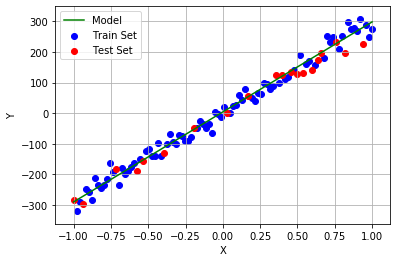

In [15]:
plt.plot(data_x[:,1], (data_x).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()